# Unit 5 - Financial Planning

In [42]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MC_Sim import MCSimulation 

%matplotlib inline

In [43]:
# Load .env enviroment variables
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [44]:
# Set current amount of crypto assets
BTC_assets = 1.2
ETH_assets = 5.3
LINK_assets = 150.0 

# NOTE for Grader: in the assignment description it says to only use BTC & ETH, 
# however I pulled LINK prices as well just for extra practice and curiosity


In [45]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
link_url = "https://api.alternative.me/v2/ticker/Chainlink/?convert=USD"

In [46]:
# extract data from API's
response_data_btc = requests.get(btc_url).json()
response_data_eth = requests.get(eth_url).json()
response_data_link = requests.get(link_url).json()

# Fetch current BTC price
BTC_price = response_data_btc['data']['1']['quotes']['USD']['price']
print(f"Current price of BTC: ${BTC_price}")

# Fetch current ETH price
ETH_price = response_data_eth['data']['1027']['quotes']['USD']['price']
print(f"Current price of ETH: ${ETH_price}")

# Fetch current LINK price 
LINK_price = response_data_link['data']['1975']['quotes']['USD']['price']
print(f"Current price of LINK: ${LINK_price}")

# Compute current value of crypto
port_value_BTC = BTC_price * BTC_assets
port_value_ETH = ETH_price * ETH_assets
port_value_LINK = LINK_price * LINK_assets

# Print current crypto wallet balance
print(f"\nThe current value of your {BTC_assets} BTC is ${port_value_BTC:0.2f}")
print(f"The current value of your {ETH_assets} ETH is ${port_value_ETH:0.2f}")
print(f"The current value of your {LINK_assets} LINK is ${port_value_LINK:0.2f}")

Current price of BTC: $24164.0
Current price of ETH: $1888.01
Current price of LINK: $9.09

The current value of your 1.2 BTC is $28996.80
The current value of your 5.3 ETH is $10006.45
The current value of your 150.0 LINK is $1363.50


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [47]:
# Set current amount of shares
my_agg_shares = 200
my_spy_shares = 50

In [48]:
# Set Alpaca API key and secret
Alpaca_Api_Key = os.getenv("ALPACA_API_KEY")
Alpaca_Secret_Key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    Alpaca_Api_Key,
    Alpaca_Secret_Key,
    api_version = 'v2'
)

In [49]:
# Format current date as ISO format
today = pd.Timestamp('2022-08-10', tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Reorganize the DataFrame, Separate ticker data
df_portfolio = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = today, 
    end = today, 
).df

SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol', axis = 1)
AGG = df_portfolio[df_portfolio['symbol'] == 'AGG'].drop('symbol', axis = 1)

# Get current closing prices for SPY and AGG
SPY_closing_price = df_portfolio['close'][1]
AGG_closing_price = df_portfolio['close'][0]

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG], axis = 1, keys = ['SPY', 'AGG'])

# Preview DataFrame
df_portfolio

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-08-10 04:00:00+00:00  418.71  420.14  416.72  419.99  68139304   

                                                      AGG                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2022-08-10 04:00:00+00:00      473663  418.182059  103.43  103.675  103.1095   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-08-10 04:00:00+00:00  103.21  6848952       19064  103.486096

In [50]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_closing_price}")
print(f"Current SPY closing price: ${SPY_closing_price}")

Current AGG closing price: $103.21
Current SPY closing price: $419.99


In [51]:
# Compute the current value of shares
port_value_SPY = SPY_closing_price * my_spy_shares
port_value_AGG = AGG_closing_price * my_agg_shares

# Print current value of shares
print(f"The current value of your {my_spy_shares} SPY shares is ${port_value_SPY:0.2f}")
print(f"The current value of your {my_agg_shares} AGG shares is ${port_value_AGG:0.2f}")

The current value of your 50 SPY shares is $20999.50
The current value of your 200 AGG shares is $20642.00


### Savings Health Analysis

In [52]:
# Set monthly household income
monthly_income = 12_000
total_value_crypto = port_value_BTC + port_value_ETH
total_value_stocks = port_value_AGG + port_value_SPY

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [total_value_crypto, total_value_stocks]}, index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,39003.253
shares,41641.500


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

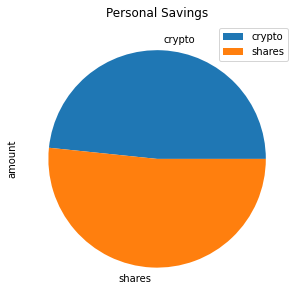

In [53]:
# Plot savings pie chart
df_savings.plot.pie(title = 'Personal Savings', y = 'amount', figsize = (5,5))

In [54]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_value_stocks + total_value_crypto

# Validate saving health
if total_savings > emergency_fund: 
    print(f'Congrats! You have enough money in this fund --> ${total_savings:,.2f}')
elif total_savings == emergency_fund: 
    print('Congrats on reaching this Financial Goal!')
elif total_savings < emergency_fund: 
    account_deficit = emergency_fund - total_savings
    print(f'You are ${account_deficit:,.2f} away from your Financial Goal!')

Congrats! You have enough money in this fund --> $80,644.75


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [55]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [57]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = today, 
    end = today, 
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis = 1)
AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis = 1, keys = ['SPY', 'AGG'])

# Display sample data
df_stock_data.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-08-10 04:00:00+00:00  418.71  420.14  416.72  419.99  68139304   

                                                      AGG                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2022-08-10 04:00:00+00:00      473663  418.182059  103.43  103.675  103.1095   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-08-10 04:00:00+00:00  103.21  6848952       19064  103.486096

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")